In [1]:
import ROOT
import pandas
import math
#matplotlib.use('agg')
%matplotlib inline
import matplotlib #as matplot
print(matplotlib.__version__)
#print(matplotlib.path)
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import numpy as np
import time

from sklearn.metrics import roc_curve, auc
import pylab
import sklearn as sk
print(sk.__version__)
from sklearn.model_selection import train_test_split

import tensorflow as tf
print(tf.__version__)
######################
import keras as kr
from keras.models import Sequential
from keras.layers import InputLayer, Input
from keras.layers import Reshape, MaxPooling2D
from keras.layers import Conv2D, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, ELU, PReLU 
from keras.optimizers import Adamax
from keras.optimizers import Nadam
print(kr.__version__)
#from keras import backend as K
import tensorflow as tf
print(tf.__version__)
config = tf.ConfigProto(intra_op_parallelism_threads=32, \
                        inter_op_parallelism_threads=32, \
                        allow_soft_placement=True, \
                        device_count = {'CPU': 32}
                       )
session = tf.Session(config=config)
#K.set_session(session)
## it will issue a warning, just ignore

Welcome to JupyROOT 6.12/07
2.2.3
0.20.1
1.6.0
2.1.4
1.6.0


Using TensorFlow backend.


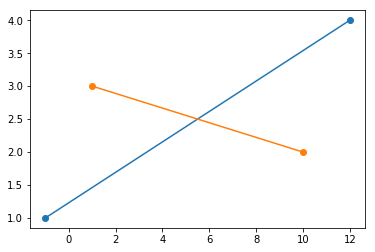

In [2]:
# test that matplotlib imported ok
x1, y1 = [-1, 12], [1, 4]
x2, y2 = [1, 10], [3, 2]
plt.plot(x1, y1, x2, y2, marker = 'o')
plt.show()

In [3]:
################
## load the data
################
channel='3l_0tau_HH'
bdtType = "evtLevelSUM_HH_res"
tauID = "dR03mvaLoose"
Bkg_mass_rand="default"
#Bkg_mass_rand="oversampling"
#run ../python/data_manager.py
execfile("../python/data_manager.py") 

#if channel=='2l_2tau_HH' : 
#    #run ../cards/info_2l_2tau_HH.py
execfile("../cards/info_3l_0tau_HH.py") 
    
output = read_from(Bkg_mass_rand, tauID)

/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-root_numpy/4.7.3-ikaegh4/lib/python2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.16.2 is currently installed but you installed root_numpy against numpy 1.15.1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [17]:
trainVars(True)

['lep1_pt',
 'lep1_conePt',
 'lep1_eta',
 'lep1_tth_mva',
 'mindr_lep1_jet',
 'mT_lep1',
 'lep2_pt',
 'lep2_conePt',
 'lep2_eta',
 'lep2_tth_mva',
 'mindr_lep2_jet',
 'mT_lep2',
 'lep3_pt',
 'lep3_conePt',
 'lep3_eta',
 'lep3_tth_mva',
 'mindr_lep3_jet',
 'mT_lep3',
 'avg_dr_jet',
 'ptmiss',
 'htmiss',
 'dr_leps',
 'genWeight',
 'evtWeight',
 'lep1_genLepPt',
 'lep2_genLepPt',
 'lep3_genLepPt',
 'lep1_fake_prob',
 'lep2_fake_prob',
 'lep3_fake_prob',
 'lep1_frWeight',
 'lep2_frWeight',
 'lep3_frWeight',
 'mbb_loose',
 'mbb_medium',
 'dr_lss',
 'dr_los1',
 'dr_los2',
 'met',
 'mht',
 'met_LD',
 'HT',
 'STMET',
 'm_jj',
 'diHiggsVisMass',
 'diHiggsMass',
 'mTMetLepton1',
 'mTMetLepton2',
 'vbf_m_jj',
 'vbf_dEta_jj',
 'numSelJets_nonVBF',
 'nJet',
 'nBJetLoose',
 'nBJetMedium',
 'nElectron',
 'nMuon',
 'lep1_isTight',
 'lep2_isTight',
 'lep3_isTight',
 'sumLeptonCharge',
 'numSameFlavor_OS',
 'isVBF']

In [21]:
print ("read from:", output["inputPath"])
print ("Date: ", time.asctime( time.localtime(time.time()) ))
data=load_data_2017(
    "/hdfs/local/sbhowmik/hhAnalysis/2017/2019Jan13_BDT/histograms/hh_2lss/forBDTtraining_SS/signal_ggf_spin0_750_hh_4t/", 
    output["channelInTree"], 
    ["lep1_pt"], 
    [], 
    bdtType, 
    channel,
    ['TTTo2L2Nu', 'TTToSemiLeptonic','DY','WZ','ZZ','WW',], 
    [250,260,270,280,300,350,400,450,500,550,600,650,700,750,800,850,900,1000],
    "defaut"
) # note: I had to add channel as argument of the function
print (len(data))
print ("Date: ", time.asctime( time.localtime(time.time()) ))

('read from:', '/hdfs/local/ssawant/hhAnalysis/2017/20181108/histograms/hh_3l/forBDTtraining_OS/')
('Date: ', 'Wed Jun 26 00:58:44 2019')
bdttype=  evtLevelSUM_HH_res
(folderName, channelTree) =  ('TTTo2L2Nu', 'hh_3l_OS_forBDTtraining')


/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.9.0-ikaegh/lib/python2.7/site-packages/ipykernel_launcher.py:309: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.9.0-ikaegh/lib/python2.7/site-packages/ipykernel_launcher.py:310: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.9.0-ikaegh/lib/python2.7/site-packages/ipykernel_launcher.py:311: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.

TTTo2L2Nu size of sig, bkg, evtweight, tot weight of data:  0 16608 122.77286 122.77286
TTTo2L2Nu events with -ve weights 2952
(folderName, channelTree) =  ('TTToSemiLeptonic', 'hh_3l_OS_forBDTtraining')
TTToSemiLeptonic size of sig, bkg, evtweight, tot weight of data:  0 118 0.037884504 0.037884504
TTToSemiLeptonic events with -ve weights 82
(folderName, channelTree) =  ('DY', 'hh_3l_OS_forBDTtraining')
DY size of sig, bkg, evtweight, tot weight of data:  0 3082 112.958275 112.958275
DY events with -ve weights 504
(folderName, channelTree) =  ('WZ', 'hh_3l_OS_forBDTtraining')
WZ size of sig, bkg, evtweight, tot weight of data:  0 178914 454.5139 454.5139
WZ events with -ve weights 7536
(folderName, channelTree) =  ('signal_ggf_spin0_250_hh_4t', 'hh_3l_OS_forBDTtraining')
signal_ggf_spin0_250_hh_4t size of sig, bkg, evtweight, tot weight of data:  416 0 0.08932483 0.08932483
signal_ggf_spin0_250_hh_4t events with -ve weights 47
(folderName, channelTree) =  ('signal_ggf_spin0_260_hh_4t'

/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.9.0-ikaegh/lib/python2.7/site-packages/ipykernel_launcher.py:316: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.9.0-ikaegh/lib/python2.7/site-packages/ipykernel_launcher.py:317: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [52]:
weights="evtWeight"

print ("Date: ", time.asctime( time.localtime(time.time()) ))
data["weight_cx"] = data[weights]
data["weight_train"] = data[weights]
data["NN_output"] = 1.0

data_even = data.loc[(data["event"].values % 2 == 0) ]
data_odd = data.loc[~(data["event"].values % 2 == 0) ]

order_train = [data_odd, data_even]
order_train_name = ["odd","even"]


print ("balance datasets by even/odd chunck")
for data_do in order_train :
    #### Normalization by cross section
    for wei in ["weight_cx", "weight_train"] :
        data_do.loc[(data_do['key'].isin(['WZ'])), [wei]]                           *= output["WZdatacard"]/data_do.loc[(data_do['key'].isin(['WZ'])), weights].sum()
        data_do.loc[(data_do['key'].isin(['ZZ'])), [wei]]                           *= output["ZZdatacard"]/data_do.loc[(data_do['key'].isin(['ZZ'])), weights].sum()
        data_do.loc[(data_do['key'].isin(['DY'])), [wei]]                           *= output["DYdatacard"]/data_do.loc[(data_do['key'].isin(['DY'])), weights].sum()
        data_do.loc[(data_do['key'].isin(['TTTo2L2Nu','TTToSemiLeptonic', 'TTToHadronic'])), [wei]] *= output["TTdatacard"]/data_do.loc[(data['key'].isin(['TTTo2L2Nu','TTToSemiLeptonic', 'TTToHadronic'])), weights].sum()
        data_do.loc[(data_do['key']=='TTZJets'), [wei]]                       *= output["TTZdatacard"]/data_do.loc[(data_do['key']=='TTZJets'), weights].sum() ## TTZJets                                                                                  
        data_do.loc[(data_do['key']=='TTWJets'), [wei]]                       *= output["TTWdatacard"]/data_do.loc[(data_do['key']=='TTWJets'), weights].sum() ## TTWJets + TTWW  
    ### Normalize sig/BKG and do table of nevents/mass
    for mass in output["masses"] :
        data_do.loc[(data_do['target']==1) & (data_do["gen_mHH"] == mass),"weight_train"] *= 1000./data_do.loc[(data_do['target']==1) & (data_do["gen_mHH"]== mass), "weight_train"].sum()
        data_do.loc[(data_do['target']==0) & (data_do["gen_mHH"] == mass),"weight_train"] *= 1000./data_do.loc[(data_do['target']==0) & (data_do["gen_mHH"]== mass), "weight_train"].sum()
    print ("Date: ", time.asctime( time.localtime(time.time()) ))

    print ("training statistics by mass")
    for mass in output["masses"] :
        print (
               str(mass)+": sig = "+\
               str(len(data_do.loc[(data['target']==1) & (data_do["gen_mHH"] == mass),["weight_train"]]))+\
               " BKG = "+str(len(data_do.loc[(data['target']==0) & (data_do["gen_mHH"] == mass),["weight_train"]]))
              )

    print ("\n norm by mass - test")
    for mass in output["masses"] :
        print (
               str(mass)+": sig = "+\
               str(data_do.loc[(data_do['target']==1) & (data_do["gen_mHH"] == mass),"weight_train"].sum())+\
               " BKG = "+str(data_do.loc[(data_do['target']==0) & (data_do["gen_mHH"] == mass),"weight_train"].sum())
              )

('Date: ', 'Fri May 10 18:52:50 2019')
balance datasets by even/odd chunck
('Date: ', 'Fri May 10 18:53:06 2019')
training statistics by mass
250: sig = 788 BKG = 627
260: sig = 763 BKG = 692
270: sig = 688 BKG = 713
280: sig = 750 BKG = 615
300: sig = 600 BKG = 636
350: sig = 713 BKG = 626
400: sig = 2128 BKG = 687
450: sig = 1105 BKG = 640
500: sig = 897 BKG = 650
550: sig = 1016 BKG = 678
600: sig = 1127 BKG = 672
650: sig = 1309 BKG = 685
700: sig = 3554 BKG = 633
750: sig = 1544 BKG = 699
800: sig = 1628 BKG = 698
850: sig = 1643 BKG = 673
900: sig = 911 BKG = 644
1000: sig = 1023 BKG = 684

 norm by mass - test
250: sig = 1000.0 BKG = 999.9999
260: sig = 1000.0 BKG = 1000.00006
270: sig = 999.99994 BKG = 1000.0001
280: sig = 1000.00006 BKG = 999.9999
300: sig = 999.9999 BKG = 999.99994
350: sig = 1000.0 BKG = 999.99994
400: sig = 1000.0 BKG = 1000.0
450: sig = 1000.0001 BKG = 1000.00006
500: sig = 1000.0 BKG = 1000.0
550: sig = 1000.0 BKG = 1000.0
600: sig = 1000.0 BKG = 1000.0
6

/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-matplotlib/2.2.3-ikaegh/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


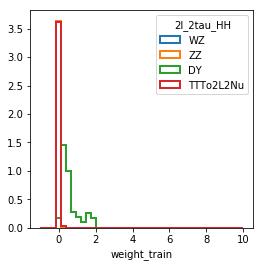

In [20]:
"""
Check of the resulting weights - the sizes of the training weight
"""
fig, ax = plt.subplots(figsize=(4, 4))
keysToBKG = ['WZ', 'ZZ', 'DY',  'TTTo2L2Nu'] # 'VH', 'ttH', 'TTZJets',  
#colors = ['cyan','orange','k','r','green','magenta','b',]
vars = ["weight_train"]#"multitarget"]

for kk, key in enumerate(keysToBKG) :
  for vv, var in enumerate(vars) : 
    ax.hist(
        np.array(data.loc[(data['key']==key), var].values,dtype='float64'), # 
        weights=data.loc[(data['key']==key), "evtWeight"], # "weight_train_cat"
        range=(-1.0,10.),bins=40, histtype='step', normed=True, lw=2, 
        label=key
    )
    ax.set_xlabel(var)
ax.legend(loc="best", title= channel)

In [34]:
## load the variables
trainvar = trainVars(False, "testVars2")
print trainvar

['diHiggsMass', 'nBJet_medium', 'tau1_pt', 'dr_lep_tau_min_SS', 'met_LD', 'diHiggsVisMass', 'm_ll', 'tau2_pt', 'dr_taus', 'mTauTau', 'gen_mHH', 'mT_lep1', 'mT_lep2', 'deltaEta_lep1_tau2', 'dr_lep1_tau1_tau2_min', 'max_tau_eta', 'max_lep_eta', 'nElectron', 'dr_lep_tau_min_OS', 'mht', 'met', 'dr_lep1_tau1_tau2_max', 'dr_leps', 'tau1_eta', 'deltaEta_lep1_tau1', 'm_lep1_tau2']


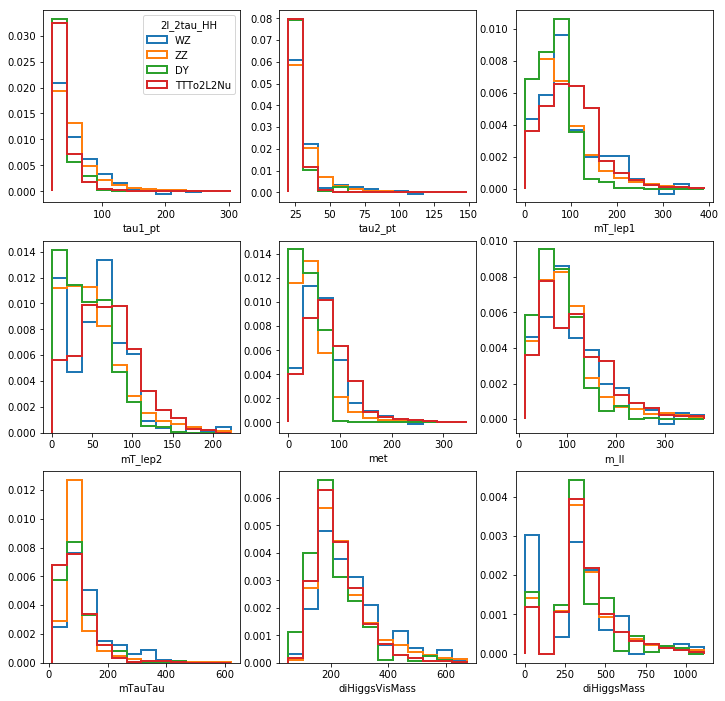

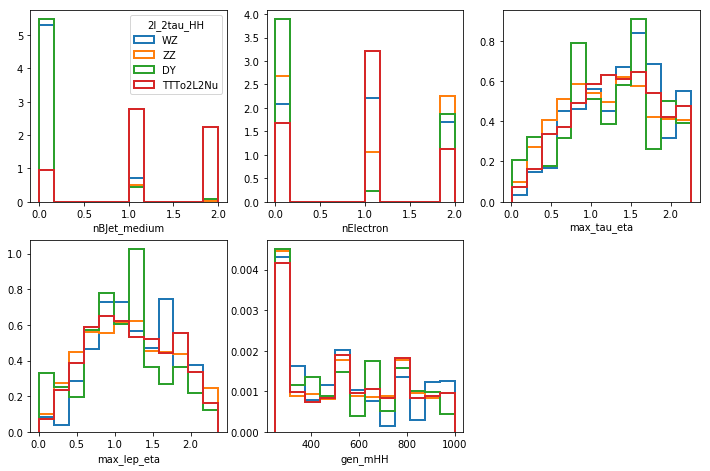

In [35]:
"""
Draw some plots on lists of variables for BKG
"""
#keysToBKG = ['TTZJets', 'WZ', 'ZZ', 'DY', 'VH', 'ttH', 'TTTo2L2Nu']
 
## i try to do 3 X 3 plots (= enter up to nine entries in each sublist)
## try to add strictly decreasing variables as first in each sublist, better for the legend positioning
listdraw = [
    [ 'tau1_pt', 'tau2_pt', 'mT_lep1', 'mT_lep2', 'met', 'm_ll', 'mTauTau', 'diHiggsVisMass', 'diHiggsMass' ], 
    ['nBJet_medium', 'nElectron', 'max_tau_eta', 'max_lep_eta', 'gen_mHH'],
]
  
for featuresDraw in listdraw:
    sizeArray=int(math.sqrt(len(featuresDraw))) if math.sqrt(len(featuresDraw)) % int(math.sqrt(len(featuresDraw))) == 0 else int(math.sqrt(len(featuresDraw)))+1
    plt.figure(figsize=(4*sizeArray,4*sizeArray))
    for n, feature in enumerate(featuresDraw) :
        min_value, max_value = np.percentile(data[feature], [0.0, 99])
        # fig, ax = plt.subplots(figsize=(4, 4))
        plt.subplot(sizeArray, sizeArray, n+1)
        for kk, key in enumerate(keysToBKG) :
            if 'TTZJets' in key or 'TTWJets' in key : linestyle = "--"
            else :linestyle = "-"
            plt.hist(
            np.array(data.loc[(data['key']==key), feature].values,dtype='float64'), 
            weights=data.loc[(data['key']==key) , "evtWeight"], 
            range=(min_value, max_value), 
            bins=12, histtype='step', ls=linestyle, 
            normed=True, lw=2, #color=colors[kk],
            label=key
            )
            plt.xlabel(feature)
        if n == 0 : plt.legend(loc="upper right", title= channel)

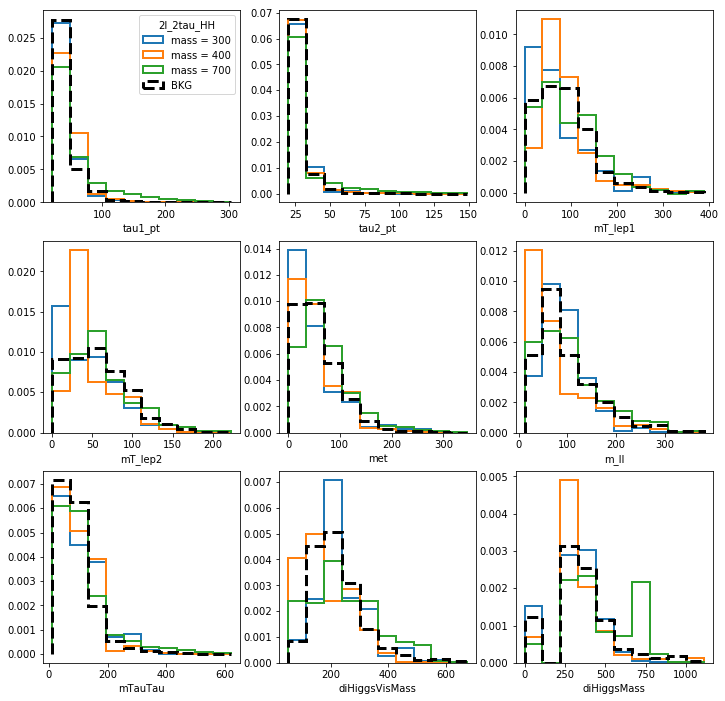

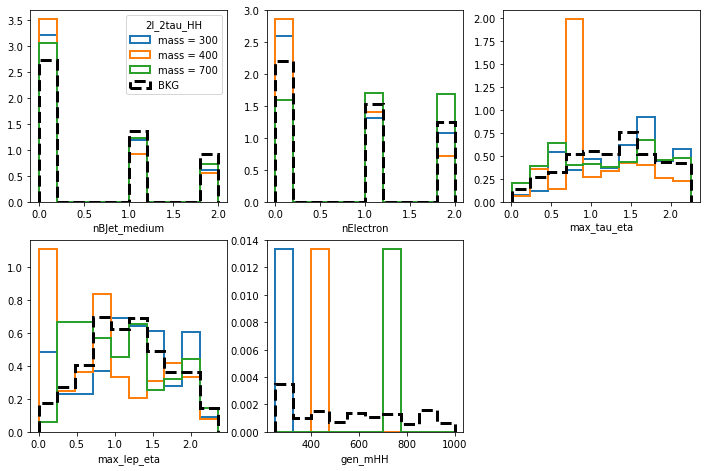

In [36]:
for featuresDraw in listdraw:
    sizeArray=int(math.sqrt(len(featuresDraw))) if math.sqrt(len(featuresDraw)) % int(math.sqrt(len(featuresDraw))) == 0 else int(math.sqrt(len(featuresDraw)))+1
    plt.figure(figsize=(4*sizeArray,4*sizeArray))
    for n, feature in enumerate(featuresDraw) :
        min_value, max_value = np.percentile(data[feature], [0.0, 99])
        # fig, ax = plt.subplots(figsize=(4, 4))
        plt.subplot(sizeArray, sizeArray, n+1)
        for mass in [300,400,700] :
            plt.hist(
            np.array(data.loc[(data["gen_mHH"] == mass), feature].values,dtype='float64'), 
            weights=data.loc[(data["gen_mHH"] == mass) , "evtWeight"], 
            range=(min_value, max_value), 
            bins=10, histtype='step', ls=linestyle, 
            normed=True, lw=2, #color=colors[kk],
            label="mass = "+str(mass)
            )
        plt.hist(
        np.array(data.loc[(data['target']==0), feature].values,dtype='float64'), 
        weights=data.loc[(data['target']==0) , "evtWeight"], 
        range=(min_value, max_value), 
        bins=10, histtype='step', ls='--', 
        normed=True, lw=3, color='k',
        label="BKG"
        )
        plt.xlabel(feature)
        if n == 0 : plt.legend(loc="upper right", title= channel)

In [37]:
# create model -- for binary activation='sigmoid'
nclasses = 1

features = trainvar
def nn_model_binary():
    "create a model."
    model = Sequential()
    model.add(Dense(2*len(features), input_dim=len(features), kernel_initializer='he_uniform')) 
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(Dropout(0.1))
    for Nnodes in [8,8] :
        model.add(Dense(Nnodes, kernel_initializer='he_uniform'))
        model.add(BatchNormalization())
        model.add(PReLU())
        model.add(Dropout(0.1))
    model.add(Dense(nclasses, activation='sigmoid'))
    model.compile(
    loss='binary_crossentropy', 
    optimizer=Nadam(lr=0.0005, schedule_decay=0.00005), # , beta_1 = 0.95, beta_2 = 0.999
    metrics=['accuracy'], 
    )
    return model

In [38]:
nn_model_binary().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 52)                1404      
_________________________________________________________________
batch_normalization_7 (Batch (None, 52)                208       
_________________________________________________________________
p_re_lu_7 (PReLU)            (None, 52)                52        
_________________________________________________________________
dropout_7 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 424       
_________________________________________________________________
batch_normalization_8 (Batch (None, 8)                 32        
_________________________________________________________________
p_re_lu_8 (PReLU)            (None, 8)                 8         
__________

In [39]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler

In [51]:
features = trainvar
# Port Keras Framework into SK-Learn
# https://stackoverflow.com/questions/39467496/error-when-using-keras-sk-learn-api
k_model_binary  = KerasClassifier(
    build_fn=nn_model_binary, 
    epochs=10, 
    batch_size=64, 
    verbose=2
)

print("data_odd[features].values", data_odd[features].values)
print("data_odd[target].values", data_odd['target'].values)
print("sample_weight=data_odd[weight_train].values", data_odd["weight_train"].values)

history = k_model_binary.fit(
    data_odd[features].values, 
    data_odd['target'].values,
    sample_weight=data_odd["weight_train"].values,
    validation_data=(
        data_even[features].values, 
        data_even['target'].values, 
        data_even["weight_train"].values
    )
)

('data_odd[features].values', array([[-1.0, 2, 66.68301391601562, ..., 0.419921875,
        0.21032461524009705, 46.37653350830078],
       [309.9949951171875, 1, 43.848411560058594, ..., 0.4256591796875,
        0.19363950192928314, 38.17782211303711],
       [391.3916015625, 2, 27.54300880432129, ..., 1.1748046875,
        -0.07542657107114792, 58.750160217285156],
       ...,
       [926.2623901367188, 0, 185.52169799804688, ..., 0.760498046875,
        0.3737373948097229, 52.1106071472168],
       [1024.6136474609375, 0, 116.1347885131836, ..., 0.249114990234375,
        -0.2096797525882721, 122.50643920898438],
       [995.8702392578125, 0, 428.6520690917969, ..., 0.157501220703125,
        0.2467237263917923, 233.2599334716797]], dtype=object))
('data_odd[target].values', array([0, 0, 0, ..., 1, 1, 1], dtype=object))
('sample_weight=data_odd[weight_train].values', array([ 1.4834088 ,  5.25094   , 22.388412  , ...,  1.3613205 ,
        0.23589732,  1.1362904 ], dtype=float32))
Tra

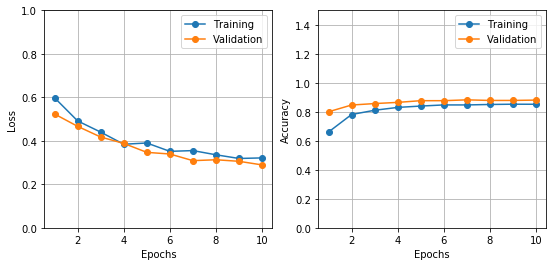

In [41]:
"""
overtraining test
"""
# Extract number of run epochs from the training history
epochs = range(1, len(history.history["loss"])+1)
plt.figure(figsize=(9, 4))
#fig = plt.figure(figsize=(4, 4))
plt.subplot(1, 2, 1)
# Extract loss on training and validation dataset and plot them together
plt.plot(epochs, history.history["loss"], "o-", label="Training")
plt.plot(epochs, history.history["val_loss"], "o-", label="Validation")
plt.xlabel("Epochs"), plt.ylabel("Loss")
#plt.yscale("log")
#plt.xlim(0,40)
plt.ylim(0.0,1.0)
plt.grid()
plt.legend();

plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(4, 4))
# Extract loss on training and validation dataset and plot them together
plt.plot(epochs, history.history["acc"], "o-", label="Training")
plt.plot(epochs, history.history["val_acc"], "o-", label="Validation")
plt.xlabel("Epochs"), plt.ylabel("Accuracy")
#plt.yscale("log")
plt.ylim(0.0,1.5)
plt.grid()
plt.legend(loc="best");

plt.show()

In [49]:
import sys
sys.path.append('/home/ram/.local/lib/python2.7/site-packages')
import eli5
from eli5.sklearn import PermutationImportance
"""
to calculate variables importance, it takes time and it is not completelly 'enlightant',
do not do all the time.
"""

"\nto calculate variables importance, it takes time and it is not completelly 'enlightant',\ndo not do all the time.\n"

In [50]:
print ("Date: ", time.asctime( time.localtime(time.time()) ))
perm = PermutationImportance(k_model_binary, random_state=1).fit( # , scoring="f1_samples"
    data_odd[features].values, 
    data_odd['target'].values,
    sample_weight=data_odd["weight_train"].values
)
print ("Date: ", time.asctime( time.localtime(time.time()) ))
eli5.show_weights(perm, feature_names = data_odd[features].columns.tolist(), top=len(features))

('Date: ', 'Fri May 10 17:49:48 2019')
('Date: ', 'Fri May 10 17:50:30 2019')


Weight,Feature
0.2156 ± 0.0052,gen_mHH
0.1879 ± 0.0036,diHiggsMass
0.0839 ± 0.0020,diHiggsVisMass
0.0277 ± 0.0009,mT_lep1
0.0243 ± 0.0013,tau1_pt
0.0197 ± 0.0027,mT_lep2
0.0155 ± 0.0015,met_LD
0.0124 ± 0.0010,met
0.0089 ± 0.0025,m_lep1_tau2
0.0086 ± 0.0017,mht


In [43]:
"""
Calculate the output in all dataset 
-- to pass to the training/test
"""

data_odd["NN_output"]  = k_model_binary.predict_proba(data_odd[features].values, verbose=1)[:, 1]
data_even["NN_output"] = k_model_binary.predict_proba(data_even[features].values, verbose=1)[:, 1]

14528/34038 [===========>..................] - ETA: 0s

/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.9.0-ikaegh/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


34038/34038 [==============================] - 0s 11us/step


/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.9.0-ikaegh/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


<Figure size 432x288 with 0 Axes>

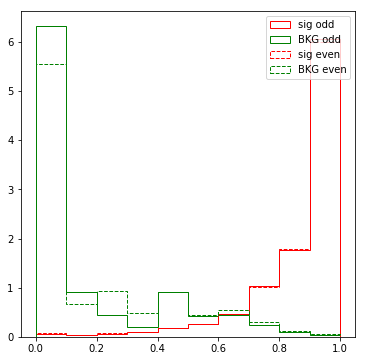

In [44]:
hist_params = {'normed': True, 'bins': 10 , 'histtype':'step'}
target = 'target'
plt.clf()

plt.figure('XGB',figsize=(6, 6))

values, bins, _ = plt.hist(
    data_odd.loc[data_odd.target.values == 1, "NN_output"].values , 
    weights=data_odd.loc[data_odd.target.values == 1, "weight_cx"].values,
    label="sig odd", color='r', range=(0,1), **hist_params
    )
values, bins, _ = plt.hist(
    data_odd.loc[data_odd.target.values == 0, "NN_output"].values , 
    weights=data_odd.loc[data_odd.target.values == 0, "weight_cx"].values,
    label="BKG odd", color='g', range=(0,1), **hist_params
    )

values, bins, _ = plt.hist(
    data_even.loc[data_even.target.values == 1, "NN_output"].values , 
    weights=(data_even.loc[data_even.target.values == 1, "weight_cx"].values),
    label="sig even", color='r', ls='--', range=(0,1), **hist_params)
values, bins, _ = plt.hist(
    data_even.loc[data_even.target.values == 0, "NN_output"].values , 
    weights=(data_even.loc[data_even.target.values == 0, "weight_cx"].values),
    label="BKG even", color='g', ls='--', range=(0,1), **hist_params)

#plt.xscale('log')
#plt.yscale('log')
plt.legend(loc='best')
plt.show()

<Figure size 432x288 with 0 Axes>

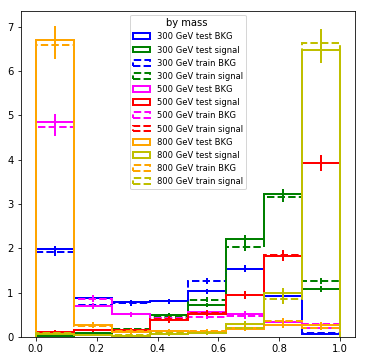

In [45]:
###############################
## classifier plot by mass
hist_params = {'normed': True, 'bins': 8 , 'histtype':'step', "lw": 2}
plt.clf()
colorcold = ['g', 'r', 'y']
colorhot = ['b', 'magenta', 'orange']

fig, ax = plt.subplots(figsize=(6, 6))
for mm, mass in enumerate(output["masses_test"]) :
    y_pred = data_even.loc[(data_even.target.values == 0) & (data_even["gen_mHH"] == mass), "NN_output"].values
    y_predS = data_even.loc[(data_even.target.values == 1) & (data_even["gen_mHH"] == mass), "NN_output"].values
    y_pred_train = data_odd.loc[(data_odd.target.values == 0) & (data_odd["gen_mHH"] == mass), "NN_output"].values
    y_predS_train = data_odd.loc[(data_odd.target.values == 1) & (data_odd["gen_mHH"] == mass), "NN_output"].values
    dict_plot = [
       [y_pred, "-", colorhot[mm],  str(mass)+" GeV test BKG"],
       [y_predS, "-", colorcold[mm], str(mass)+" GeV test signal"],
       [y_pred_train, "--", colorhot[mm], str(mass)+" GeV train BKG" ],
       [y_predS_train, "--", colorcold[mm],      str(mass)+" GeV train signal"]
    ]
    for item in dict_plot :
        values1, bins, _ = ax.hist(
            item[0],
            ls=item[1], color = item[2],
            label=item[3],
            range=(0,1),
            **hist_params
            )
        normed = sum(y_pred)
        mid = 0.5*(bins[1:] + bins[:-1])
        err=np.sqrt(values1*normed)/normed # denominator is because plot is normalized
        plt.errorbar(mid, values1, yerr=err, fmt='none', color= item[2], ecolor= item[2], edgecolor=item[2], lw=2)
#plt.xscale('log')
#plt.yscale('log')
ax.legend(loc='upper center', title="by mass ", fontsize = 'small')
#nameout = channel+'/'+bdtType+'_'+trainvar+'_'+str(len(trainVars(False)))+'_'+hyppar+'_mass_'+ str(mass)+'_XGBclassifier.pdf'

train set auc 0.9249264128424208 (mass = 300)
test set auc 0.8803759389746387 (mass = 300)
train set auc 0.8803759389746387 (mass = 300)
test set auc 0.9249264128424208 (mass = 300)
train set auc 0.9492977852186031 (mass = 500)
test set auc 0.9626710106595923 (mass = 500)
train set auc 0.9626710106595923 (mass = 500)
test set auc 0.9492977852186031 (mass = 500)
train set auc 0.9916985862402 (mass = 800)
test set auc 0.9801120978354878 (mass = 800)
train set auc 0.9801120978354878 (mass = 800)
test set auc 0.9916985862402 (mass = 800)


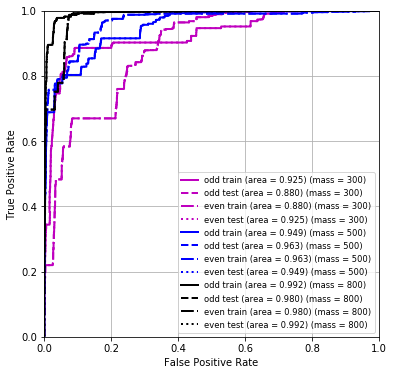

In [46]:
###############################
# by mass ROC
styleline = ['-', '--', '-.', ':']
colors_mass = ['m', 'b', 'k', 'r', 'g',  'y', 'c', ]
fig, ax = plt.subplots(figsize=(6, 6))
sl = 0


for mm, mass in enumerate(output["masses_test"]) :
    for dd, data_do in  enumerate(order_train) :
        if dd == 0 : val_data = 1
        else : val_data = 0
        fpr, tpr, thresholds = roc_curve(
            data_do.loc[(data_do["gen_mHH"] == mass), "target"].astype(np.bool),
            data_do.loc[(data_do["gen_mHH"] == mass), "NN_output"].values,
            sample_weight=(data_do.loc[(data_do["gen_mHH"].astype(np.int) == int(mass)), "weight_cx"].astype(np.float64))
        )
        train_auc = auc(fpr, tpr, reorder = True)
        print("train set auc " + str(train_auc) + " (mass = " + str(mass) + ")")
        fprt, tprt, thresholds = roc_curve(
            order_train[val_data].loc[(order_train[val_data]["gen_mHH"].astype(np.int) == int(mass)), target].astype(np.bool), 
            order_train[val_data].loc[(order_train[val_data]["gen_mHH"] == mass), "NN_output"].values, #proba[:,1],
            sample_weight=(order_train[val_data].loc[(order_train[val_data]["gen_mHH"].astype(np.int) == int(mass)), "weight_cx"].astype(np.float64))
        )
        test_auct = auc(fprt, tprt, reorder = True)
        print("test set auc " + str(test_auct) + " (mass = " + str(mass) + ")")
        ax.plot(
            fpr, tpr,
            lw = 2, linestyle = styleline[dd + dd*1], color = colors_mass[mm],
            label = order_train_name[dd] + ' train (area = %0.3f)'%(train_auc) + " (mass = " + str(mass) + ")"
            )
        sl += 1
        ax.plot(
            fprt, tprt,
            lw = 2, linestyle = styleline[dd + 1 + + dd*1], color = colors_mass[mm],
            label = order_train_name[dd] + ' test (area = %0.3f)'%(test_auct) + " (mass = " + str(mass) + ")"
            )
        sl += 1
ax.set_ylim([0.0,1.0])
ax.set_xlim([0.0,1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc="lower right", fontsize = 'small')
ax.grid()


In [38]:
"""
output a training and export to .pb (to be used on cpp)
"""
print ("Date: ", time.asctime( time.localtime(time.time()) ))
nameout = "model_erase"

out = k_model_binary.model.save("test_"+nameout+".hdf5")
file = open(nameout+"_variables.log","w")
file.write(str(features)+"\n")
file.close()


## This bellow does not work, easier to be done on the command line,
## in any case the bellow is a template how to run it
##!python ../test/convert_hdf5_2_pb.py --input "test_"+nameout+".hdf5" --output "test_"+nameout+".pb"

('Date: ', 'Tue Apr 16 13:33:54 2019')


In [ ]:
"""
If you want to load a model to reconpute anything or check loading just substitute k_model --> k_model_loaded
It only loads hdf5 format
"""
from keras.models import load_model
k_model_loaded = load_model("test_model_2lss_ttH_3cat_no4mom_noSemi_v6.hdf5")

In [47]:
## the next do correlation matrices with variables
import seaborn 

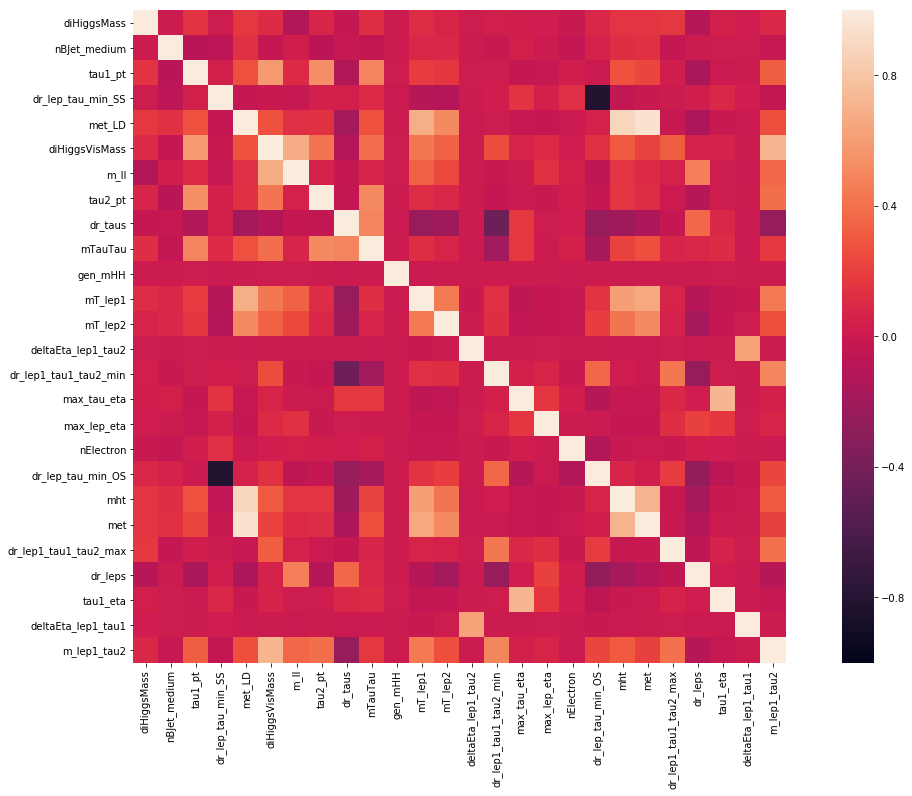

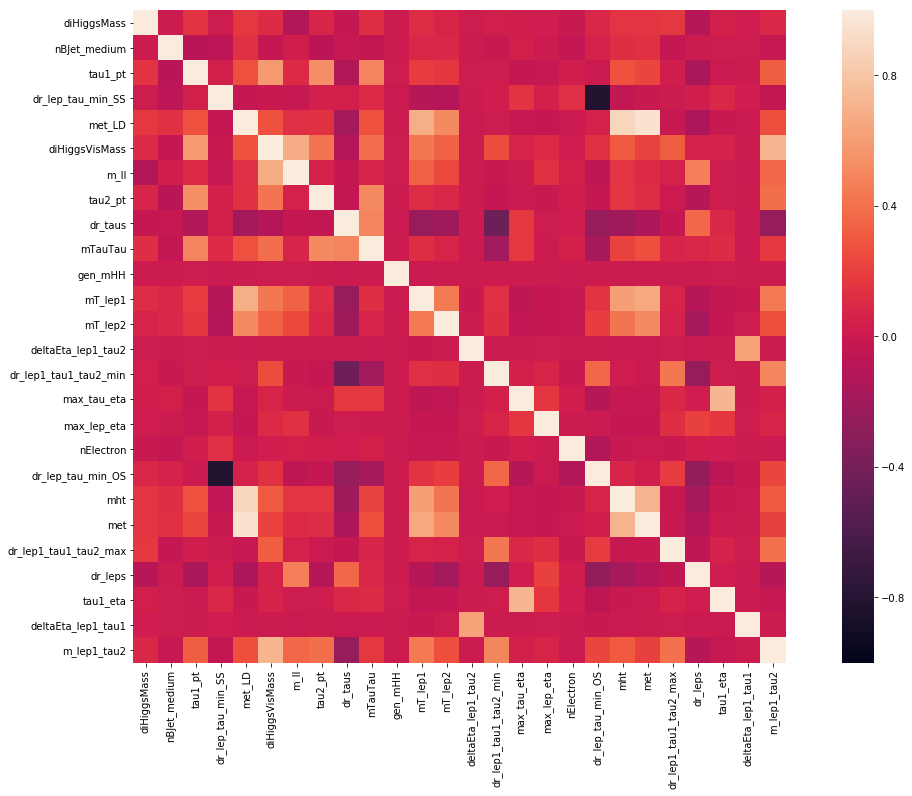

In [48]:
for target in [0,1] :
    corr_mat = data.loc[(data['target']==0), features].astype(float).corr() #
    fig, ax = plt.subplots(figsize=(20, 12)) 
    seaborn.heatmap(corr_mat, square=True, ax=ax, vmin=-1., vmax=1.);